In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=4dd6b0cc455683787f2b3de064779f9d9261f7d4a0f9f39c72ed719ce15d68c4
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


In [ ]:
pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing

  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-yvjs8ipa
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-yvjs8ipa
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done


In [1]:

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/x_data.npy


drive/MyDrive/x_data.npy


LOADING **DATA**

In [2]:
import numpy as np

dataset_X = np.load('drive/MyDrive/x_data.npy', encoding='bytes')

In [3]:
dataset_Y = np.load('drive/MyDrive/y_data.npy', encoding='bytes')

**TAKING LESS DATA TO RUN FASTER**

In [4]:
import zipfile
import pandas as pd


X = np.array(dataset_X)
y = np.array(dataset_Y)
print('X, y:', X.shape, y.shape)

X=X[:450]
y=y[:450]

list_of_tuples = list(zip(X,y))
df = pd.DataFrame(list_of_tuples, columns = ['X', 'y'])


X, y: (1360, 224, 224, 3) (1360,)


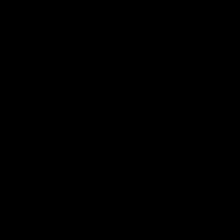

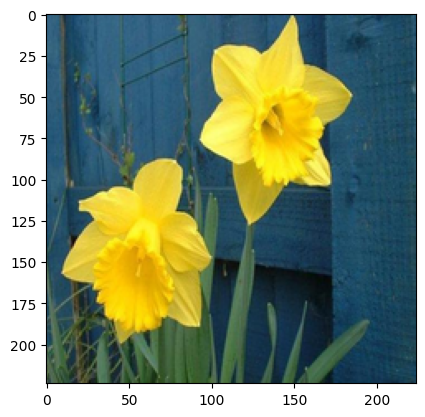

In [5]:
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

cv2_imshow(X[5])
plt.imshow(X[5])  # greens, reds, blues, rgb



In [6]:
for i in range(len(X)):
  X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)

**Print Number of images and shape of the images.**

In [ ]:
print(X.shape)

(150, 224, 224, 3)


In [62]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(X)):
  images_decreased.append( cv2.resize(X[i], dimensions, interpolation=cv2.INTER_LINEAR))

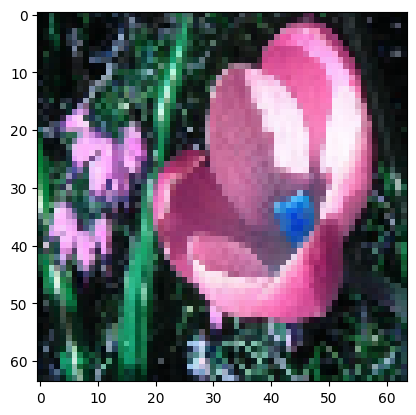

In [ ]:
plt.imshow(images_decreased[3])

In [ ]:


# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))



**Display 5 random images. **

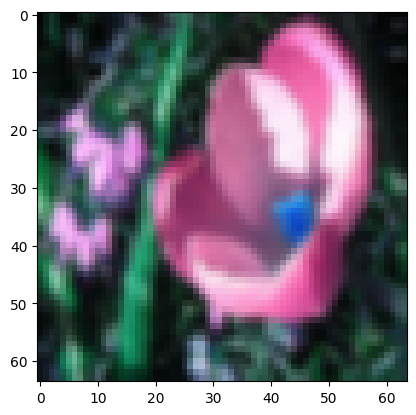

In [ ]:
plt.imshow(images_gb[3])

[102 435 348 270 106  71 188  20 102 121]


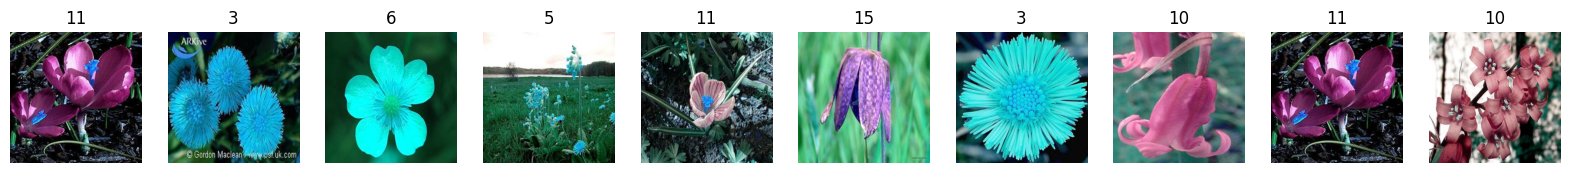

In [45]:

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

Transform the image into grayscale format and display the same

[214 330  87 372  99 359 151 130 149 308]


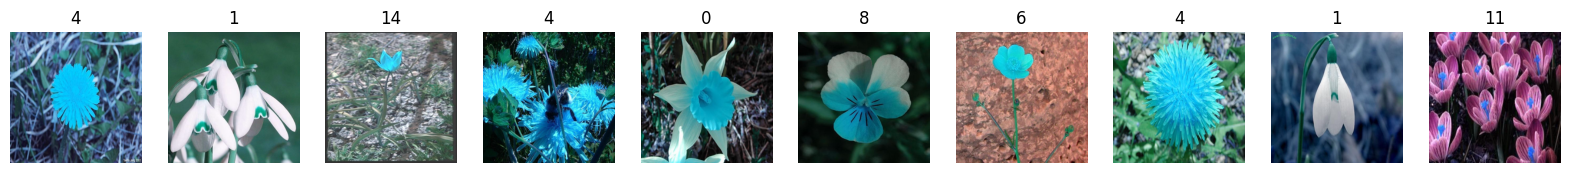

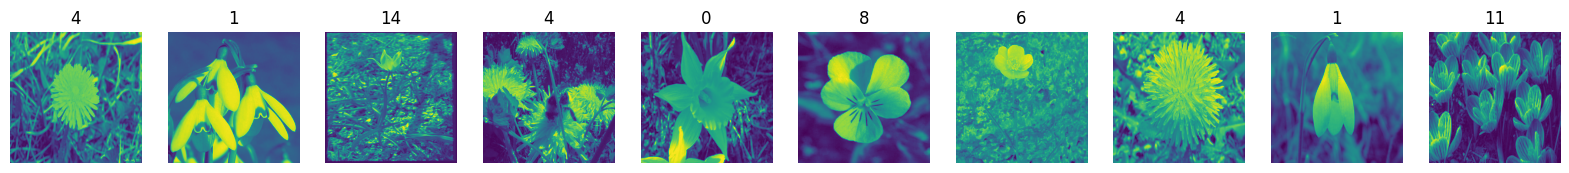

In [46]:
from PIL import Image, ImageFilter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Filter import
from PIL.ImageFilter import (BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)

# image object
from PIL import Image




# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()



# VISUALIZATION

plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    gray_image = cv2.cvtColor(X[j],cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image)  # greens, reds, blues, rgb

    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

**Apply a filter to sharpen the image and display the image before and after sharpening**

[257 343 413 293 385 191 443 276 160 313]


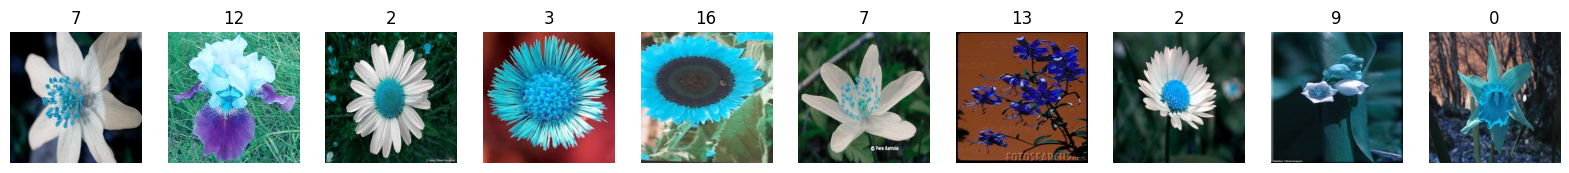

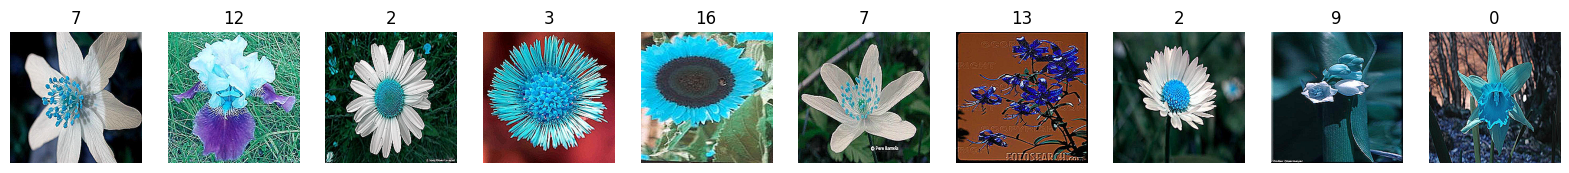

In [47]:


from PIL import Image, ImageFilter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Filter import
from PIL.ImageFilter import (BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)

# image object
from PIL import Image




# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

kernel1 = np.array([[0.0, -1.0, 0],[-1.0, 5.0, -1.0],[0, -1.0, 0]])

# VISUALIZATION

plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    #gray = cv2.cvtColor(X[j], cv2.COLOR_BGR2GRAY)
    sharpened = cv2.filter2D(X[j], -1, kernel1)
    plt.imshow(sharpened)  # greens, reds, blues, rgb


    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

**Apply a filter to blur the image and display the image before and after blur. **

[ 21 252 235 344  48  58 169 187 270 189]


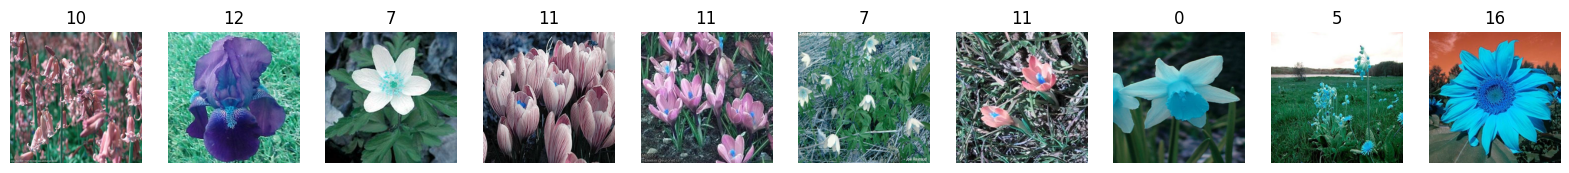

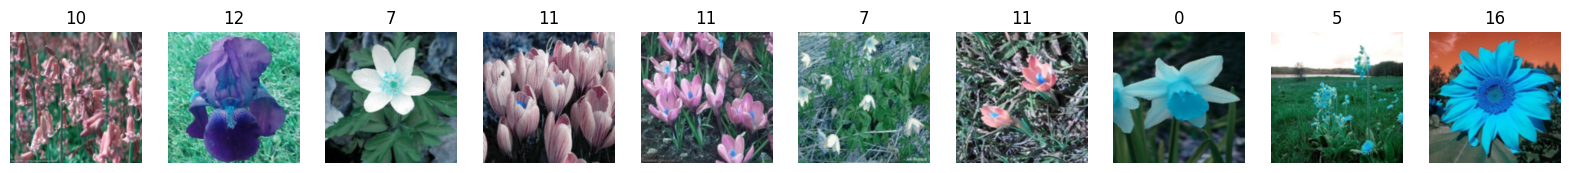

In [48]:
from PIL import Image, ImageFilter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Filter import
from PIL.ImageFilter import (BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)

# image object
from PIL import Image




# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
# VISUALIZATION

plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    #gray = cv2.cvtColor(X[j], cv2.COLOR_BGR2GRAY)
    sharpened = cv2.filter2D(X[j], -2, gaussian)
    plt.imshow(sharpened)  # greens, reds, blues, rgb

    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

** Display all the 4 images from above questions besides each other to observe the difference. **

[134  20 328 166 273 387  88 315  13 241]
       ORIGINAL IMAGES


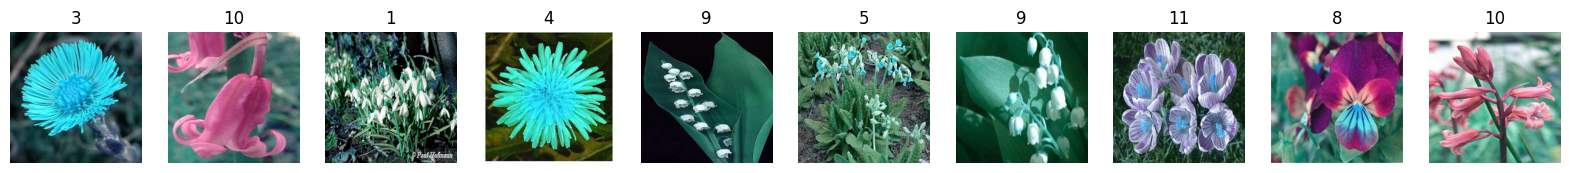

       GRAY  IMAGES


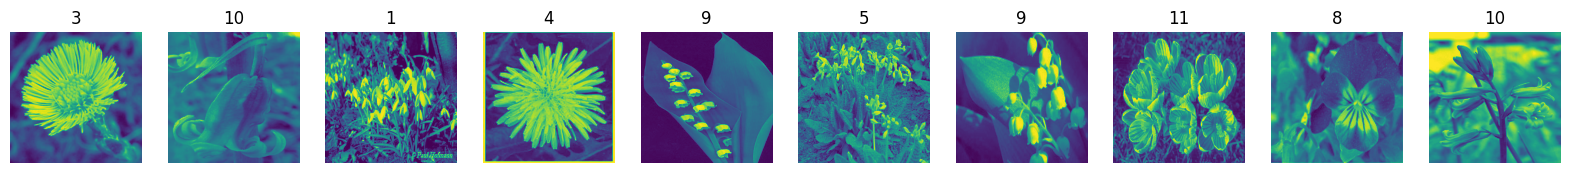

       SHARPENED  IMAGES


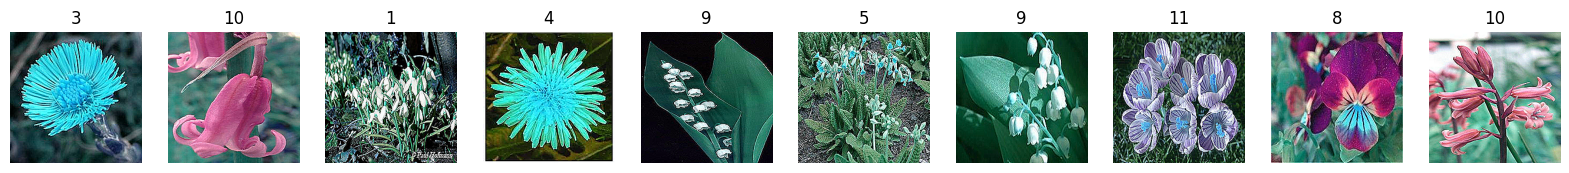

       BLURRED  IMAGES


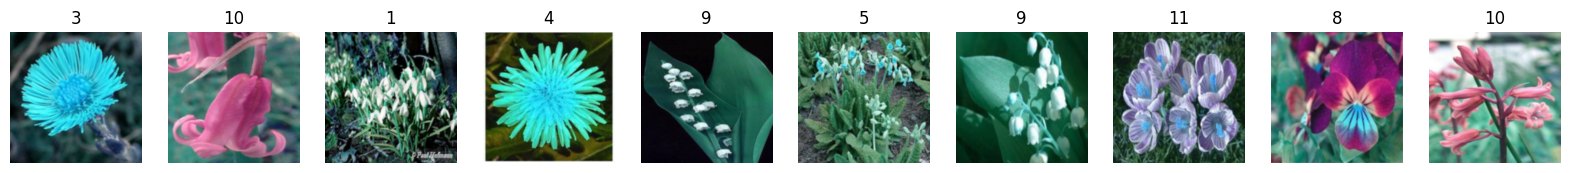

In [53]:
from PIL import Image, ImageFilter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Filter import
from PIL.ImageFilter import (BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN)

# image object
from PIL import Image




# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)

print("       ORIGINAL IMAGES")
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()



plt.figure(figsize=(20, 20))
print("       GRAY  IMAGES")

for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)

    gray_image = cv2.cvtColor(X[j],cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image)  # greens, reds, blues, rgb

    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()



kernel1 = np.array([[0.0, -1.0, 0],[-1.0, 5.0, -1.0],[0, -1.0, 0]])

# VISUALIZATION

plt.figure(figsize=(20, 20))
print("       SHARPENED  IMAGES")

for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    #gray = cv2.cvtColor(X[j], cv2.COLOR_BGR2GRAY)
    sharpened = cv2.filter2D(X[j], -1, kernel1)
    plt.imshow(sharpened)  # greens, reds, blues, rgb


    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()





gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
# VISUALIZATION

plt.figure(figsize=(20, 20))
print("       BLURRED  IMAGES")

for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    #gray = cv2.cvtColor(X[j], cv2.COLOR_BGR2GRAY)
    sharpened = cv2.filter2D(X[j], -2, gaussian)
    plt.imshow(sharpened)  # greens, reds, blues, rgb

    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

** Print count of each class from y**

In [54]:
print("NUMBER OF TIMES THE EACH INDIVIDUAL ELEMENT OF OUTPUT")
print(df.pivot_table(columns=['y'], aggfunc='size'))

NUMBER OF TIMES THE EACH INDIVIDUAL ELEMENT OF OUTPUT
y
0     23
1     25
2     30
3     21
4     26
5     27
6     28
7     30
8     28
9     24
10    29
11    27
12    26
13    30
14    20
15    21
16    35
dtype: int64


**USING LABEL ENCODING OF TARGET VARIABLE**

In [64]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_encoded = enc.fit_transform(y)



** Split the data into train and test with 80:20 proportion. [**

In [65]:


from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),y_encoded , test_size=0.17, random_state=1,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.32, random_state=1,stratify=y_temp)



In [34]:


print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)



(253, 64, 64, 3) (253, 17)
(120, 64, 64, 3) (120, 17)
(77, 64, 64, 3) (77, 17)


In [66]:


# Normalizing the image pixels
X_train = X_train.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0
X_test= X_test.astype('float32')/255.0



In [36]:


# Clearing backend
from tensorflow.keras import backend
backend.clear_session()



** Train a model using Neural Network and share performance metrics on test data.

Train a model using a basic CNN and share performance metrics on test data **

In [38]:
from keras.optimizers import RMSprop
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2,2)))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same', strides=(2,2)))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(17, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)

optimizer = Adam(lr=0.01)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

**Train a model using any Supervised Learning algorithm and share performance metrics on test data**

In [68]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

from sklearn.ensemble import RandomForestClassifier


modelR=RandomForestClassifier()
#nsamples, nx, ny = train_dataset.shape
#d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))
print(x_train2.shape,y_train.shape)

modelR.fit(x_train2,y_train)

#(253, 224, 224, 3) (253,)
#y_train_r.reshape(253,1)


(253, 12288) (253, 17)


RandomForestClassifier()

In [80]:
y_pred=modelR.predict(x_test2)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.25      1.00      0.40         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.33      1.00      0.50         2

   micro avg       0.04   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. FOR CONVOLUTIONAL AND NUERAL NETWORK MODEL**

In [39]:


history_1 = model.fit(
            X_train, y_train,
            epochs=200,
            validation_data=(X_val,y_val),
            batch_size=22
)



Epoch 1/200
12/12 [==============================] - 11s 635ms/step - loss: 2.8339 - accuracy: 0.0632 - val_loss: 2.8325 - val_accuracy: 0.0667
Epoch 2/200
12/12 [==============================] - 5s 447ms/step - loss: 2.8351 - accuracy: 0.0593 - val_loss: 2.8320 - val_accuracy: 0.0750
Epoch 3/200
12/12 [==============================] - 6s 540ms/step - loss: 2.8314 - accuracy: 0.0514 - val_loss: 2.8314 - val_accuracy: 0.0750
Epoch 4/200
12/12 [==============================] - 6s 511ms/step - loss: 2.8313 - accuracy: 0.0632 - val_loss: 2.8309 - val_accuracy: 0.0750
Epoch 5/200
12/12 [==============================] - 5s 459ms/step - loss: 2.8210 - accuracy: 0.0751 - val_loss: 2.8305 - val_accuracy: 0.0750
Epoch 6/200
12/12 [==============================] - 8s 667ms/step - loss: 2.8099 - accuracy: 0.0632 - val_loss: 2.8296 - val_accuracy: 0.0750
Epoch 7/200
12/12 [==============================] - 5s 455ms/step - loss: 2.7604 - accuracy: 0.0830 - val_loss: 2.8297 - val_accuracy: 0.066

Text(0.5, 1.0, 'Training and validation loss')

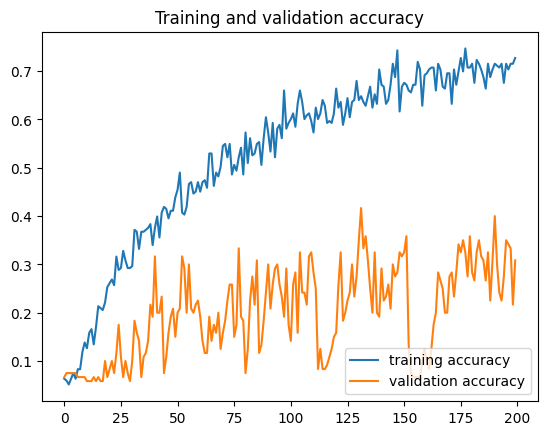

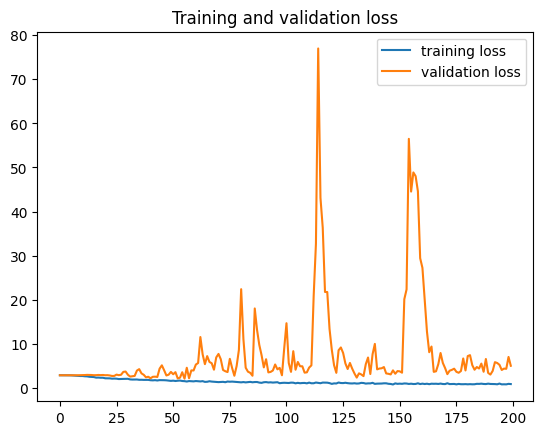

In [42]:
%matplotlib inline

accuracy      = history_1.history['accuracy']
val_accuracy  = history_1.history['val_accuracy']
loss     = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

1/1 [==============================] - 0s 42ms/step
Softmax Outputs: [[6.7914178e-04 4.5064910e-04 1.0344926e-05 2.5384792e-04 6.3977200e-03
  4.1460464e-04 3.6248022e-03 2.3115441e-05 1.6529893e-04 3.5729758e-03
  5.8830681e-04 2.6778909e-05 2.6633395e-02 7.6786005e-01 3.7698538e-04
  7.9119141e-04 1.8813075e-01]]
0.99999994
Predicted_Label: 13


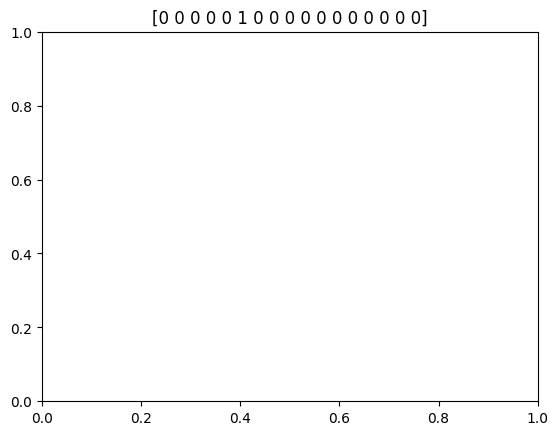

In [44]:
#Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 13


plt.title(y_test[n])
y_pred = model.predict(X_test[n].reshape(1, 64, 64, 3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']   ## This is the order in which the dataset is read
for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('Predicted_Label:', labels[j])

**INPUT LABEL GIVEN IS 13 AND OUTPUT IS 13  IMAGE IS NOT SHOWN AS WE HAVE BINARY ENCODED IT IN 1ST PLACE **

y
0     11
1     11
2     11
3      6
4     11
5      8
6      7
7      8
8      7
9     10
10    10
11     9
12     8
13     8
14     6
15     9
16    10
dtype: int64
